In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display
import sklearn
from sklearn.model_selection import train_test_split, FixedThresholdClassifier
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, Normalizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, KFold, StratifiedShuffleSplit
from sklearn.metrics import classification_report, precision_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay
from sklearn.metrics import recall_score, accuracy_score

In [4]:
path_train = "train_wine.csv"

In [5]:
df = pd.read_csv(path_train)
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,5.0,0.74,0.00,1.20,0.041,16.0,46.0,0.99258,4.01,0.59,12.5,6
1,11.0,0.26,0.68,2.55,0.085,10.0,25.0,0.99700,3.18,0.61,11.8,5
2,7.3,0.38,0.21,2.00,0.080,7.0,35.0,0.99610,3.33,0.47,9.5,5
3,8.9,0.28,0.45,1.70,0.067,7.0,12.0,0.99354,3.25,0.55,12.3,7
4,9.2,0.41,0.50,2.50,0.055,12.0,25.0,0.99520,3.34,0.79,13.3,7
...,...,...,...,...,...,...,...,...,...,...,...,...
1290,9.5,0.39,0.41,8.90,0.069,18.0,39.0,0.99859,3.29,0.81,10.9,7
1291,8.5,0.34,0.40,4.70,0.055,3.0,9.0,0.99738,3.38,0.66,11.6,7
1292,15.0,0.21,0.44,2.20,0.075,10.0,24.0,1.00005,3.07,0.84,9.2,7
1293,7.5,0.52,0.40,2.20,0.060,12.0,20.0,0.99474,3.26,0.64,11.8,6


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1295 entries, 0 to 1294
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1294 non-null   float64
 1   volatile acidity      1294 non-null   float64
 2   citric acid           1295 non-null   float64
 3   residual sugar        1295 non-null   float64
 4   chlorides             1295 non-null   float64
 5   free sulfur dioxide   1295 non-null   float64
 6   total sulfur dioxide  1295 non-null   float64
 7   density               1295 non-null   float64
 8   pH                    1294 non-null   float64
 9   sulphates             1293 non-null   float64
 10  alcohol               1295 non-null   float64
 11  quality               1295 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 121.5 KB


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1294.0,8.438872,1.818823,4.70000,7.200000,8.1000,9.400000,15.9000
volatile acidity,1294.0,0.500920,0.182181,0.12000,0.360000,0.4800,0.620000,1.5800
citric acid,1295.0,0.298880,0.200443,0.00000,0.120000,0.3100,0.455000,1.0000
residual sugar,1295.0,2.573398,1.366700,0.90000,1.900000,2.2000,2.600000,15.5000
chlorides,1295.0,0.085467,0.045056,0.01200,0.068000,0.0780,0.090000,0.6110
free sulfur dioxide,1295.0,15.362934,10.487662,1.00000,7.000000,13.0000,21.000000,72.0000
total sulfur dioxide,1295.0,44.651351,35.420622,7.00000,20.000000,34.0000,57.000000,289.0000
density,1295.0,0.996576,0.001968,0.99007,0.995315,0.9966,0.997765,1.0032
pH,1294.0,3.303648,0.157238,2.74000,3.200000,3.3000,3.390000,4.0100
sulphates,1293.0,0.678415,0.169927,0.33000,0.570000,0.6400,0.760000,2.0000


Видим наличие пропущенных данных, выведем эти строки, чтобы понять, что с ними делать

In [8]:
missing_data_rows = df[df.isnull().any(axis=1)]
missing_data_rows

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
637,6.4,0.530,0.09,3.9,0.123,14.0,31.0,0.99680,3.50,NaN,11.0,4
698,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
720,NaN,0.705,0.10,2.8,0.081,13.0,28.0,0.99631,NaN,0.66,10.2,5
1146,7.2,NaN,0.33,2.5,0.068,34.0,102.0,0.99414,3.27,0.78,12.8,6


Удаляем пропущенные данные и вместе с ними все дубликаты

In [9]:
df = df.dropna()
df = df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1015 entries, 0 to 1293
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1015 non-null   float64
 1   volatile acidity      1015 non-null   float64
 2   citric acid           1015 non-null   float64
 3   residual sugar        1015 non-null   float64
 4   chlorides             1015 non-null   float64
 5   free sulfur dioxide   1015 non-null   float64
 6   total sulfur dioxide  1015 non-null   float64
 7   density               1015 non-null   float64
 8   pH                    1015 non-null   float64
 9   sulphates             1015 non-null   float64
 10  alcohol               1015 non-null   float64
 11  quality               1015 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 103.1 KB


In [10]:
#Проверим уникальные значения в столбце quality
print("Уникальные значения в столбце quality:", df['quality'].unique())

Уникальные значения в столбце quality: [6 5 7 3 8 4]


In [11]:
X = df.drop('quality', axis=1)
y = df['quality']
y = y.apply(lambda y_value : 1 if y_value >= 7 else 0)

print(X.shape)
print(y.shape)

(1015, 11)
(1015,)


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

print("Размеры обучающей выборки:", X_train.shape, y_train.shape)
print("Размеры тестовой выборки:", X_test.shape, y_test.shape)

Размеры обучающей выборки: (812, 11) (812,)
Размеры тестовой выборки: (203, 11) (203,)


### Будем смотреть на метрику точности (Precision)
так как нам важно, чтобы доля вин, попавших в положительный класс и действительно являющихся "хорошими", была максимальной

### Алгоритм ближайшие соседи (KNN)

In [13]:
cv = KFold(n_splits=5, shuffle=True, random_state=42)

pipe_kn = Pipeline([('preprocessing', MinMaxScaler()), 
                 ('classifier', KNeighborsClassifier())])

n_neighbors = [53, 54, 55] #подобрали эти значения вручную
p = [1, 2] #и эти тоже

weights = ['uniform', 'distance']

param_grid_kn = [
    {'preprocessing': [MinMaxScaler(), StandardScaler(), RobustScaler()],
     'classifier': [KNeighborsClassifier(n_jobs=-1)],
     'classifier__n_neighbors': n_neighbors,
     'classifier__p': p,
     'classifier__weights': weights
    }
]

grid_kn = GridSearchCV(pipe_kn, param_grid_kn, cv = cv, scoring = 'precision', return_train_score = True, n_jobs = -1)


grid_kn.fit(X_train, y_train)
grid_kn

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('preprocessing', MinMaxScaler()),
                                       ('classifier', KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid=[{'classifier': [KNeighborsClassifier(n_jobs=-1)],
                          'classifier__n_neighbors': [53, 54, 55],
                          'classifier__p': [1, 2],
                          'classifier__weights': ['uniform', 'distance'],
                          'preprocessing': [MinMaxScaler(), StandardScaler(),
                                            RobustScaler()]}],
             return_train_score=True, scoring='precision')

In [14]:
grid_result_kn = pd.DataFrame(grid_kn.cv_results_).sort_values(["rank_test_score",'std_test_score']).T
grid_result_kn

,12,0,24,3,27,15,16,21,4,28,...,22,7,31,2,8,19,14,20,26,32
mean_fit_time,0.009666,0.011055,0.011639,0.010878,0.012433,0.009452,0.007777,0.008557,0.011132,0.009491,...,0.012628,0.008937,0.010015,0.011294,0.013123,0.009292,0.012043,0.013656,0.01493,0.017596
std_fit_time,0.004643,0.00393,0.007142,0.003764,0.007616,0.00368,0.003212,0.003945,0.002582,0.002645,...,0.006565,0.004596,0.002631,0.001457,0.003757,0.003505,0.001708,0.00428,0.004996,0.005749
mean_score_time,0.047597,0.046147,0.057355,0.036464,0.037856,0.041201,0.0388,0.032464,0.028218,0.04116,...,0.035998,0.043722,0.059807,0.046822,0.042584,0.048758,0.046614,0.045198,0.04907,0.04847
std_score_time,0.005047,0.006581,0.014254,0.013361,0.019578,0.005792,0.008717,0.00445,0.006246,0.015641,...,0.003716,0.005317,0.023278,0.012637,0.007546,0.005963,0.009486,0.00987,0.007761,0.01033
param_classifier,KNeighborsClassifier(n_jobs=-1),KNeighborsClassifier(n_jobs=-1),KNeighborsClassifier(n_jobs=-1),KNeighborsClassifier(n_jobs=-1),KNeighborsClassifier(n_jobs=-1),KNeighborsClassifier(n_jobs=-1),KNeighborsClassifier(n_jobs=-1),KNeighborsClassifier(n_jobs=-1),KNeighborsClassifier(n_jobs=-1),KNeighborsClassifier(n_jobs=-1),...,KNeighborsClassifier(n_jobs=-1),KNeighborsClassifier(n_jobs=-1),KNeighborsClassifier(n_jobs=-1),KNeighborsClassifier(n_jobs=-1),KNeighborsClassifier(n_jobs=-1),KNeighborsClassifier(n_jobs=-1),KNeighborsClassifier(n_jobs=-1),KNeighborsClassifier(n_jobs=-1),KNeighborsClassifier(n_jobs=-1),KNeighborsClassifier(n_jobs=-1)
param_classifier__n_neighbors,54,53,55,53,55,54,54,54,53,55,...,54,53,55,53,53,54,54,54,55,55
param_classifier__p,1,1,1,1,1,1,1,2,1,1,...,2,2,2,1,2,2,1,2,1,2
param_classifier__weights,uniform,uniform,uniform,distance,distance,distance,distance,distance,distance,distance,...,distance,uniform,uniform,uniform,uniform,uniform,uniform,uniform,uniform,uniform
param_preprocessing,MinMaxScaler(),MinMaxScaler(),MinMaxScaler(),MinMaxScaler(),MinMaxScaler(),MinMaxScaler(),StandardScaler(),MinMaxScaler(),StandardScaler(),StandardScaler(),...,StandardScaler(),StandardScaler(),StandardScaler(),RobustScaler(),RobustScaler(),StandardScaler(),RobustScaler(),RobustScaler(),RobustScaler(),RobustScaler()
params,{'classifier': KNeighborsClassifier(n_jobs=-1)...,{'classifier': KNeighborsClassifier(n_jobs=-1)...,{'classifier': KNeighborsClassifier(n_jobs=-1)...,{'classifier': KNeighborsClassifier(n_jobs=-1)...,{'classifier': KNeighborsClassifier(n_jobs=-1)...,{'classifier': KNeighborsClassifier(n_jobs=-1)...,{'classifier': KNeighborsClassifier(n_jobs=-1)...,{'classifier': KNeighborsClassifier(n_jobs=-1)...,{'classifier': KNeighborsClassifier(n_jobs=-1)...,{'classifier': KNeighborsClassifier(n_jobs=-1)...,...,{'classifier': KNeighborsClassifier(n_jobs=-1)...,{'classifier': KNeighborsClassifier(n_jobs=-1)...,{'classifier': KNeighborsClassifier(n_jobs=-1)...,{'classifier': KNeighborsClassifier(n_jobs=-1)...,{'classifier': KNeighborsClassifier(n_jobs=-1)...,{'classifier': KNeighborsClassifier(n_jobs=-1)...,{'classifier': KNeighborsClassifier(n_jobs=-1)...,{'classifier': KNeighborsClassifier(n_jobs=-1)...,{'classifier': KNeighborsClassifier(n_jobs=-1)...,{'classifier': KNeighborsClassifier(n_jobs=-1)...


In [15]:
grid_kn.best_params_

{'classifier': KNeighborsClassifier(n_jobs=-1),
 'classifier__n_neighbors': 54,
 'classifier__p': 1,
 'classifier__weights': 'uniform',
 'preprocessing': MinMaxScaler()}

In [16]:
pipe_best_kn = make_pipeline(MinMaxScaler(), KNeighborsClassifier(n_neighbors = 54, p = 1, weights = 'uniform'))
pipe_best_kn.fit(X_train,y_train)

y_pred_best_kn = pipe_best_kn.predict(X_test)

print('Лучшая модель: Точность на тестовом наборе:',precision_score(y_test, y_pred_best_kn))

Лучшая модель: Точность на тестовом наборе: 0.6666666666666666


              precision    recall  f1-score   support

           0       0.87      0.99      0.93       175
           1       0.67      0.07      0.13        28

    accuracy                           0.87       203
   macro avg       0.77      0.53      0.53       203
weighted avg       0.84      0.87      0.82       203



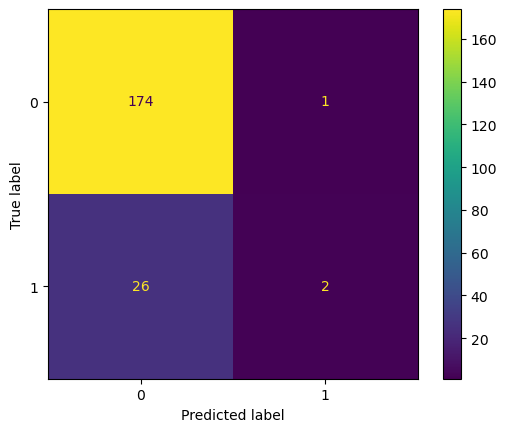

In [17]:
matrix_kn = confusion_matrix(y_test, y_pred_best_kn)
ConfusionMatrixDisplay(matrix_kn).plot();
print(classification_report(y_test, y_pred_best_kn))

Пробуем дальше =>

### Наивный Байес

In [18]:
cv = KFold(n_splits=5, shuffle=True, random_state=42)

pipe_nb = Pipeline([('preprocessing', StandardScaler()), ('classifier', KNeighborsClassifier())])

param_grid_nb =[
    {
        'preprocessing': [MinMaxScaler(), StandardScaler(), RobustScaler()],
        'classifier': [GaussianNB()]
    }
]

grid_nb = GridSearchCV(pipe_nb, param_grid_nb, cv = cv, scoring = 'precision', return_train_score = True, n_jobs = -1)

grid_nb.fit(X_train, y_train)
grid_nb

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('preprocessing', StandardScaler()),
                                       ('classifier', KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid=[{'classifier': [GaussianNB()],
                          'preprocessing': [MinMaxScaler(), StandardScaler(),
                                            RobustScaler()]}],
             return_train_score=True, scoring='precision')

In [19]:
grid_result_nb = pd.DataFrame(grid_nb.cv_results_).sort_values(['rank_test_score','std_test_score']).T
grid_result_nb

,0,1,2
mean_fit_time,0.007547,0.010019,0.013165
std_fit_time,0.000699,0.001561,0.001676
mean_score_time,0.00602,0.008349,0.005789
std_score_time,0.000409,0.001824,0.000957
param_classifier,GaussianNB(),GaussianNB(),GaussianNB()
param_preprocessing,MinMaxScaler(),StandardScaler(),RobustScaler()
params,"{'classifier': GaussianNB(), 'preprocessing': ...","{'classifier': GaussianNB(), 'preprocessing': ...","{'classifier': GaussianNB(), 'preprocessing': ..."
split0_test_score,0.657143,0.657143,0.657143
split1_test_score,0.4,0.4,0.4
split2_test_score,0.483871,0.483871,0.483871


In [20]:
grid_kn.best_params_

{'classifier': KNeighborsClassifier(n_jobs=-1),
 'classifier__n_neighbors': 54,
 'classifier__p': 1,
 'classifier__weights': 'uniform',
 'preprocessing': MinMaxScaler()}

In [21]:
pipe_best_nb = make_pipeline(MinMaxScaler(), GaussianNB())
pipe_best_nb.fit(X_train,y_train)

y_pred_best_nb = pipe_best_nb.predict(X_test)

print('Лучшая модель: Точность на тестовом наборе:',precision_score(y_test, y_pred_best_nb))

Лучшая модель: Точность на тестовом наборе: 0.38461538461538464


              precision    recall  f1-score   support

           0       0.95      0.82      0.88       175
           1       0.38      0.71      0.50        28

    accuracy                           0.80       203
   macro avg       0.67      0.77      0.69       203
weighted avg       0.87      0.80      0.83       203



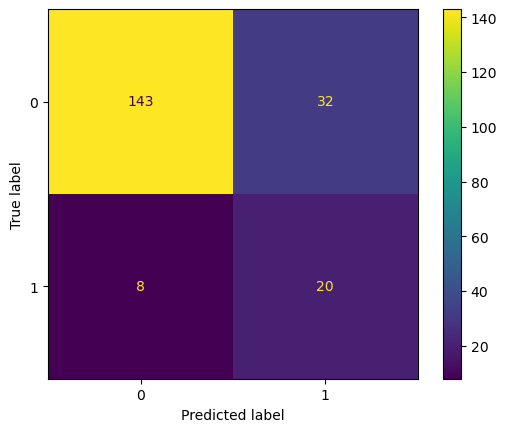

In [22]:
matrix_nb = confusion_matrix(y_test, y_pred_best_nb)
ConfusionMatrixDisplay(matrix_nb).plot();
print(classification_report(y_test, y_pred_best_nb))

Не будем такими же наивными, как Байес, дальше =>

### Логистическая регрессия

In [23]:
pipe_lr = Pipeline([
    ('preprocessing', StandardScaler()),
    ('clf', LogisticRegression(solver='liblinear', class_weight='balanced'))
])

cv = StratifiedShuffleSplit(test_size = 0.3, n_splits = 5, random_state = 42)

scaling = [ MinMaxScaler(), StandardScaler(),RobustScaler(), Normalizer()]

param_grid_lr =[
    {'preprocessing': scaling,'clf__penalty': ['l2'], 
         'clf__solver': ['newton-cg' ,'lbfgs', 'liblinear', 'sag', 'saga']},
    {'preprocessing': scaling,'clf__penalty': ['l1'], 
         'clf__solver': ['liblinear']},
    {'preprocessing': scaling,'clf__penalty': [None], 
         'clf__solver': ['lbfgs','newton-cg']}
    ]

grid_lr = GridSearchCV(pipe_lr, param_grid_lr, scoring='precision', cv=cv, n_jobs=-1, return_train_score=True)
grid_lr.fit(X_train, y_train)
grid_lr

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=5, random_state=42, test_size=0.3,
            train_size=None),
             estimator=Pipeline(steps=[('preprocessing', StandardScaler()),
                                       ('clf',
                                        LogisticRegression(class_weight='balanced',
                                                           solver='liblinear'))]),
             n_jobs=-1,
             param_grid=[{'clf__penalty': ['l2'],
                          'clf__solver': ['newton-cg', 'lbfgs', 'liblinear',
                                          'sag', 'saga'],
                          'preprocessin...aler(),
                                            RobustScaler(), Normalizer()]},
                         {'clf__penalty': ['l1'], 'clf__solver': ['liblinear'],
                          'preprocessing': [MinMaxScaler(), StandardScaler(),
                                            RobustScaler(), Normalizer()]},
                         {'clf__penalty': [None],
                          'clf__solver': ['lbfgs', 'newton-cg'],
                          'preprocessing': [MinMaxScaler(), StandardScaler(),
                                            RobustScaler(), Normalizer()]}],
             return_train_score=True, scoring='precision')

In [24]:
grid_result_lr = pd.DataFrame(grid_lr.cv_results_).sort_values(["rank_test_score",'std_test_score']).T
grid_result_lr

,31,27,21,22,2,6,9,14,13,5,...,4,12,16,20,23,3,7,15,19,11
mean_fit_time,0.027606,0.034053,0.012653,0.016764,0.024252,0.02265,0.013773,0.034336,0.026968,0.016519,...,0.023636,0.019388,0.016688,0.021234,0.019996,0.016999,0.012952,0.01654,0.019029,0.012179
std_fit_time,0.004172,0.003475,0.004343,0.004126,0.004628,0.003593,0.005676,0.010795,0.013076,0.004226,...,0.008655,0.006155,0.005733,0.006078,0.003551,0.005129,0.003261,0.001776,0.009797,0.005641
mean_score_time,0.007368,0.007118,0.006893,0.007259,0.006921,0.007037,0.007414,0.011614,0.009839,0.006899,...,0.006005,0.006502,0.008702,0.01746,0.021846,0.007996,0.012055,0.010044,0.008365,0.007036
std_score_time,0.000518,0.000206,0.00157,0.001783,0.000767,0.00083,0.000954,0.004726,0.003886,0.000363,...,0.000331,0.000611,0.003853,0.011862,0.024801,0.00109,0.00997,0.003293,0.004185,0.000751
param_clf__penalty,None,None,l1,l1,l2,l2,l2,l2,l2,l2,...,l2,l2,l2,l1,l1,l2,l2,l2,l2,l2
param_clf__solver,newton-cg,lbfgs,liblinear,liblinear,newton-cg,lbfgs,liblinear,sag,sag,lbfgs,...,lbfgs,sag,saga,liblinear,liblinear,newton-cg,lbfgs,sag,saga,liblinear
param_preprocessing,Normalizer(),Normalizer(),StandardScaler(),RobustScaler(),RobustScaler(),RobustScaler(),StandardScaler(),RobustScaler(),StandardScaler(),StandardScaler(),...,MinMaxScaler(),MinMaxScaler(),MinMaxScaler(),MinMaxScaler(),Normalizer(),Normalizer(),Normalizer(),Normalizer(),Normalizer(),Normalizer()
params,"{'clf__penalty': None, 'clf__solver': 'newton-...","{'clf__penalty': None, 'clf__solver': 'lbfgs',...","{'clf__penalty': 'l1', 'clf__solver': 'libline...","{'clf__penalty': 'l1', 'clf__solver': 'libline...","{'clf__penalty': 'l2', 'clf__solver': 'newton-...","{'clf__penalty': 'l2', 'clf__solver': 'lbfgs',...","{'clf__penalty': 'l2', 'clf__solver': 'libline...","{'clf__penalty': 'l2', 'clf__solver': 'sag', '...","{'clf__penalty': 'l2', 'clf__solver': 'sag', '...","{'clf__penalty': 'l2', 'clf__solver': 'lbfgs',...",...,"{'clf__penalty': 'l2', 'clf__solver': 'lbfgs',...","{'clf__penalty': 'l2', 'clf__solver': 'sag', '...","{'clf__penalty': 'l2', 'clf__solver': 'saga', ...","{'clf__penalty': 'l1', 'clf__solver': 'libline...","{'clf__penalty': 'l1', 'clf__solver': 'libline...","{'clf__penalty': 'l2', 'clf__solver': 'newton-...","{'clf__penalty': 'l2', 'clf__solver': 'lbfgs',...","{'clf__penalty': 'l2', 'clf__solver': 'sag', '...","{'clf__penalty': 'l2', 'clf__solver': 'saga', ...","{'clf__penalty': 'l2', 'clf__solver': 'libline..."
split0_test_score,0.431373,0.442308,0.446154,0.446154,0.446154,0.446154,0.446154,0.439394,0.453125,0.446154,...,0.430769,0.430769,0.430769,0.411765,0.241758,0.223404,0.223404,0.223404,0.223404,0.215054
split1_test_score,0.387097,0.348485,0.354839,0.354839,0.354839,0.354839,0.354839,0.354839,0.354839,0.354839,...,0.365079,0.365079,0.365079,0.363636,0.233766,0.210526,0.210526,0.210526,0.210526,0.210526


In [25]:
grid_lr.cv_results_['params'][31]

{'clf__penalty': None,
 'clf__solver': 'newton-cg',
 'preprocessing': Normalizer()}

In [26]:
pipe_best_lr = make_pipeline(Normalizer(), LogisticRegression(solver = 'newton-cg', penalty = None) )
pipe_best_lr.fit(X_train,y_train)
y_pred_best_lr = pipe_best_lr.predict(X_test)
print('Лучшая модель: Точность на тестовом наборе:',precision_score(y_test, y_pred_best_lr))

Лучшая модель: Точность на тестовом наборе: 0.5


              precision    recall  f1-score   support

           0       0.88      0.97      0.92       175
           1       0.50      0.21      0.30        28

    accuracy                           0.86       203
   macro avg       0.69      0.59      0.61       203
weighted avg       0.83      0.86      0.84       203



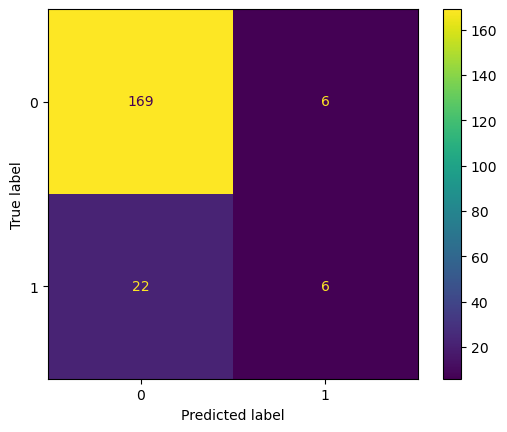

In [27]:
matrix_lr = confusion_matrix(y_test, y_pred_best_lr)
ConfusionMatrixDisplay(matrix_lr).plot();
print(classification_report(y_test, y_pred_best_lr))

### Сравним алгоритмы

In [28]:
pipe_1 = make_pipeline(MinMaxScaler(), KNeighborsClassifier(n_neighbors = 54, p = 1, weights = 'uniform'))
pipe_2 = make_pipeline(MinMaxScaler(), GaussianNB())
pipe_3 = make_pipeline(Normalizer(), LogisticRegression(solver = 'newton-cg', penalty = None) )

pipe_1.fit(X_train,y_train)
pipe_2.fit(X_train,y_train)
pipe_3.fit(X_train,y_train)

y_train_pred_1 = pipe_1.predict(X_train)
y_test_pred_1 = pipe_1.predict(X_test)

y_train_pred_2 = pipe_2.predict(X_train)
y_test_pred_2 = pipe_2.predict(X_test)

y_train_pred_3 = pipe_3.predict(X_train)
y_test_pred_3 = pipe_3.predict(X_test)

print("Тренировка: ", precision_score(y_train, y_train_pred_1), 
      "   Тест: ", precision_score(y_test, y_test_pred_1))

print("Тренировка: ", precision_score(y_train, y_train_pred_2), 
      "   Тест: ", precision_score(y_test, y_test_pred_2))

print("Тренировка: ", precision_score(y_train, y_train_pred_3), 
      "   Тест: ", precision_score(y_test, y_test_pred_3))

Тренировка:  0.7857142857142857    Тест:  0.6666666666666666
Тренировка:  0.4624277456647399    Тест:  0.38461538461538464
Тренировка:  0.5789473684210527    Тест:  0.5


Ближайшие соседи самые дружелюбные

In [29]:
pipe_1.predict_proba(X_test)[:10]

array([[0.98148148, 0.01851852],
       [0.98148148, 0.01851852],
       [0.96296296, 0.03703704],
       [0.96296296, 0.03703704],
       [0.62962963, 0.37037037],
       [0.85185185, 0.14814815],
       [0.64814815, 0.35185185],
       [0.98148148, 0.01851852],
       [0.94444444, 0.05555556],
       [0.88888889, 0.11111111]])

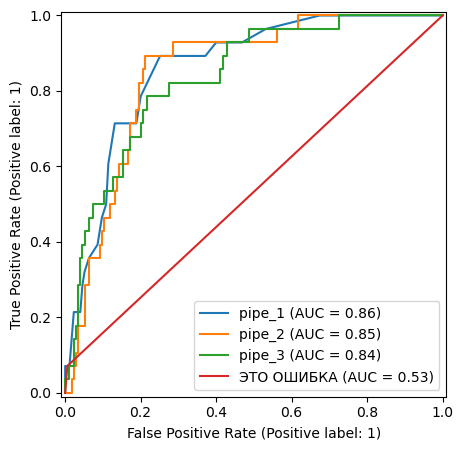

In [30]:
fig, ax_roc = plt.subplots(1,1, figsize=(10, 5))
RocCurveDisplay.from_estimator(pipe_1, X_test, y_test, ax = ax_roc, name = 'pipe_1');
RocCurveDisplay.from_estimator(pipe_2, X_test, y_test, ax = ax_roc, name = 'pipe_2');
RocCurveDisplay.from_estimator(pipe_3, X_test, y_test, ax = ax_roc, name = 'pipe_3');

RocCurveDisplay.from_predictions(y_test, y_test_pred_1, ax = ax_roc, name = 'ЭТО ОШИБКА')

### Выбираем первую модель (KNN), посмотрим для нее пороги и попробуем улучшить результат

In [31]:
ths = pd.DataFrame({'predict':pipe_1.predict_proba(X_test)[:,1],
                    'true':y_test})
ths.sort_values(by='predict', ascending=False)

,predict,true
863,0.592593,1
57,0.592593,1
47,0.537037,0
445,0.500000,0
962,0.481481,0
...,...,...
1065,0.000000,0
672,0.000000,0
684,0.000000,0
820,0.000000,0


Попробуем изменить порог для алгоритма KNN: сравним все метрики при разных порогах

In [32]:
def apply_threshold(prob, threshold=0.5):
    return np.where(prob >= threshold, 1, 0)

y_prob = pipe_1.predict_proba(X_test)[:, 1]

thresholds = [0.45, 0.5, 0.55,]
for thresh in thresholds:
    y_pred_thresh = apply_threshold(y_prob, threshold=thresh)
    precision = precision_score(y_test, y_pred_thresh)
    recall = recall_score(y_test, y_pred_thresh)
    accuracy = accuracy_score(y_test, y_pred_thresh)
    print(f"Threshold: {thresh:.2f}  Precision: {precision:.3f}  Recall: {recall:.3f}  Accuracy: {accuracy:.3f}")

Threshold: 0.45  Precision: 0.600  Recall: 0.214  Accuracy: 0.872
Threshold: 0.50  Precision: 0.500  Recall: 0.071  Accuracy: 0.862
Threshold: 0.55  Precision: 1.000  Recall: 0.071  Accuracy: 0.872


Лучшее значение вышло при пороге 0.55, при этом другие метрики не пострадали. Применим его к алгоритму:

In [33]:
pipe_best_knn = make_pipeline(MinMaxScaler(), KNeighborsClassifier(n_neighbors = 54, p = 1, weights = 'uniform'))
best_knn = FixedThresholdClassifier(pipe_best_knn, threshold=0.55)
best_knn.fit(X_train, y_train)
y_best_knn = best_knn.predict(X_test)

print('Лучшая модель: Точность на тестовом наборе:',precision_score(y_test, y_best_knn))

Лучшая модель: Точность на тестовом наборе: 1.0


Построим новую матрицу ошибок

              precision    recall  f1-score   support

           0       0.87      1.00      0.93       175
           1       1.00      0.07      0.13        28

    accuracy                           0.87       203
   macro avg       0.94      0.54      0.53       203
weighted avg       0.89      0.87      0.82       203



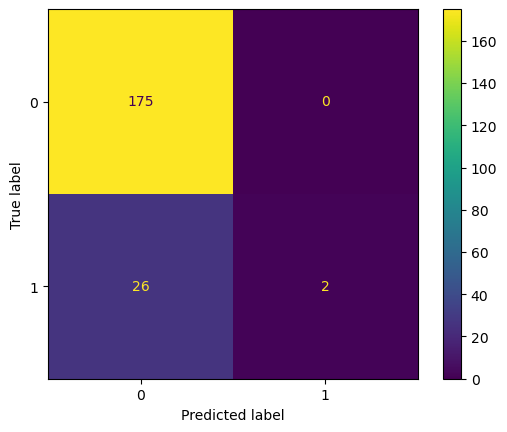

In [34]:
matrix_knn = confusion_matrix(y_test, y_best_knn)
ConfusionMatrixDisplay(matrix_knn).plot();
print(classification_report(y_test, y_best_knn))

### Выводы
Модель обучалась на очень дисбалансных данных, поэтому результат вышел так себе. Зато мы точно не выберем плохое вино, подумав, что оно хорошее. Можно было и лучше, но я слегла с температурой, поэтому не смогла довести модель до идеала. Надеюсь, это не очень плохо для первого раза